# WeRateDogs Data Wrangling Project

## The Purpose of This Project

As per the project motivation and instruction, the gaol is to "wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations."

Three data sources will be used for the analysis:
 - Tweet Archive
 - Image Prediction
 - Twitter API interaction data

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
#import glob as gb
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="dark")

% matplotlib inline

### **1. Data Gathering**

The purpose of this step is

Reading data already provided for by Udacity

**1.1 Opening Twitter Archive CSV File**

In [2]:
#Opening the default file provided through Udacity

archive=pd.read_csv('twitter-archive-enhanced.csv')


**1.2 Downloading Image Predictions TSV**

In [3]:
prediction_tsv = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', mode='wb') as file:
    file.write(prediction_tsv.content)

In [4]:
pred=pd.read_csv('image-predictions.tsv', delimiter="\t") #the dellimiter was found through manual inspection of the file

**1.3 Extracting JSON through Twitter API**

In [5]:
#creating the API object as per Udacity instructions
#note that I don't possess the required information since the API access was not approved.
import tweepy

consumer_key = 'xxxxx'
consumer_secret = 'xxxxx'
access_token = 'xxxxx'
access_secret = 'xxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
#Testing the API through code from the provided twitter-api.rtf
#The 


tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832


KeyboardInterrupt: 

***Due to the lack of access to Twitter API, the ready JSON file from step #4 Twitter API was used instead. Please skipt to the next cell.***

In [7]:
#Reading the txt file into a datadframe, for reference
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html
tw_interactions=pd.read_json('tweet-json.txt',lines=True)

### **2. Data Assessment**

The purpose of this step is visually and programatically assess the available data that we extracted in the first step.

Exploring available data.
- **2.1 Archive Dataframe**

In [8]:
archive.info()
archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Toby          7
an            7
Daisy         7
Bailey        7
Buddy         7
Koda          6
Leo           6
Jax           6
Scout         6
Milo          6
Bella         6
Dave          6
Rusty         6
Stanley       6
Jack          6
Oscar         6
Sammy         5
           ... 
Tiger         1
Ziva          1
General       1
Goose         1
Jazzy         1
Kenzie        1
Monster       1
Heinrich      1
Bloo          1
Griswold      1
Rambo         1
BeBe          1
Rascal        1
Charl         1
Tebow         1
Tommy         1
Randall       1
Remus         1
Ebby          1
Nico          1
Maxwell       1
Halo          1
Damon         1
Jay           1
Eevee         1
Rontu         1
Georgie       1
Carll         1
Kingsley      1
Livvie        1
Name: name, Length: 957,

In [10]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

First notes from the **Archive** dataframe:
- tweet_id is an integer, while this is not really an issue it technically should be a string
- timestamp is an object (string), should be parced as datetime
- columns with too many missing information that should be  deleted, as they are not strongly needed by this analysis, and the dataframe would be cleaner (source,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,  retweeted_status_timestamp)
- The doggo, floofer, pupper, poppo columns are values, not column titles. merging them into a new column, let's say "Category" would be useful. The null value is also shown as None, which bypasses the programatic assessment. 
- The name column has strange values such as 'a' which is not a name
- The name column also has "None" values rather than nulls.
- Since some ratings have different denominator, we might consider creating a new column with calcualted score
- one rating_denominator value is zero, this might need to be removed.
- The source column is apparently an HTML code that has to be cleaned for meaningful information.


Everything else appears to be fine from a first look.


- **2.2 Predictions Dataframe**

In [11]:
pred.info()
pred.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


First notes from the **Predictions** dataframe:
- tweet_id is an integer, while this is not really an issue it technically should be a string
- jpg_url column might not be necessary, but we will keep it for th etime being since the dataset is small anyway
- dog names are seperated with "_", while this is not a big issue we might consider replacing it with a space instead.
- the dataframe is smaller than the Archive one

Everything else seems ok from a first look.  

- **2.3 Tweet Interaction Dataframe**

In [12]:
tw_interactions.info()
tw_interactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [13]:
(tw_interactions['id_str']==tw_interactions['id']).mean()

0.64485981308411211

First notes from the **tw_interactions** dataframe:
- There are many columns that are unneccesary for the type of analysis we want to do. It's recommended to drop all columns except for (favorite_count, retweet_count, id, id_str)
- id and id_str should be the same , however and not all of the values are identical, only 64.5% match. While normally one of them should be sufficient, perhaps its better to keep them both for further inspections.
- id and id_str data types are integers, they should be converted to strings since they are not subject to mathamatical assessment. 
- the final id column should be renamed to tweet_id to match the other two columns

Everything else seems ok from a first look.  

### **3. Data Cleaning**


There were a number of issues selected from the above observations for cleaning before doing any analysis:

 1. **Data Quality Issues**
 
	 1. **Columns Removal**
         1. ***Archive Dataframe***
             - Columns with too many missing information that should be deleted, as they are not strongly needed by this analysis, and the dataframe would be cleaner (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp)
             - The null values is also shown as None in various columns including the dog stage and the name column, which bypasses the programmatic assessment.
         2. ***Prediction Dataframe***
             - all will be kept.
         3. ***Tweet Interaction Dataframe***
             - There are many columns that are unneccesary for the type of analysis we want to do. It's recommended to drop all columns except for (favorite_count, retweet_count, id, id_str)

     2. **Column Rename**
         1. ***Tweet Interaction Dataframe***
             - the final id column should be renamed to tweet_id to unify with the other two dataframes

     3. **Zero rating denominator** 
         1. ***Archive Dataframe*** 
               - One rating_denominator value is zero, this would need to be removed since it would be problematic for mathamatical assessment
     4. **Adding new rating column**
         1. ***Archive Dataframe***
             - Since some ratings have different denominator, we might consider creating a new column with calcualted score
              
     5. **Data Replacement**
         1. ***Archive Dataframe***
             - The null values is also shown as None in various columns including the dog stage and the name column, which bypasses the programmatic assessment.
         2. ***Prediction Dataframe***
             - dog names are separated with "_", while this is not a big issue we might consider replacing it with a space instead.
     6. **Incorrect Data Types**
        1. Changing IDs from Integer to String:
            - tweet_id in both Archive and Prediction Dataframes to be converted from Integer to String
            - id and id_str in Tweet Interaction Dataframe
        2. Changing timestamp from an object (String) to datetime
            - The timestamp in the Archive need to be changed to datetime format for connection and to enable timeseries analysis
     7. **Extrcting Meaningful data from within a column**
        1. ***Archive Dataframe***
            - The source column has to be cleaned from an HTML code to extract meaningful information.
     8. **Duplicated Data Entry** (from Udacity Feedback)
        1. ***Different dataframe size***:
            - The Image Predicton Dataframe had 2075 entries, compared to 2356 in the Archive Dataframe and 2354 in the Tweet Interaction
            - There are apparently tweets that are duplicated in the dataframe due to retweet. This would need to be filtered out through the final dataframe with rows that do not have images before conducting any further analysis.
         
 2. **Data Tidiness Issues**
	1. **Dog stage variables forming different columns**
        - In the Archive dataframe, the doggo, floofer, pupper, poppo columns are values, not column titles. merging them into a new column, let's say "Category" would be useful. 

    2. **Merging the three tables form one observational unit**
        - There are three different tables that should be joined into one for practicality.


**3.1 Making Copies**

In [14]:
#making a copy for cleaning
archive_cln=archive.copy()
pred_cln=pred.copy()
intr_cln=tw_interactions.copy()

**3.2 Cleaning Data Quality Issues**

***(DQ.A) Unnecessary Column Removal***

**Define**: Remove the following columsn from each of the three dataframes:
- Archive: source,in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp
- Prediction: keep all
- Tweet Interaction: all except favorite_count, retweet_count, id, id_str  

**Code**

In [15]:
#Dropping the defined Archive columns
archive_cln.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                          'retweeted_status_id', 'retweeted_status_user_id' ,
                          'retweeted_status_timestamp'],inplace=True)

In [16]:
#all of the Prediction Dataframe will be kept

In [17]:
#Dropping the defined Tweet Interaction columns
#dropping unnecessaty columns
intr_cln.drop(columns=['contributors','coordinates', 'created_at',
                          'display_text_range', 'entities',
                          'extended_entities','favorited','full_text','geo','in_reply_to_screen_name',
                      'in_reply_to_status_id','in_reply_to_status_id_str',
                      'in_reply_to_user_id','in_reply_to_user_id_str',
                      'is_quote_status','lang','place','possibly_sensitive','possibly_sensitive_appealable',
                      'quoted_status','quoted_status_id','quoted_status_id_str','retweeted',
                      'retweeted_status','source','truncated','user'],inplace=True)

**Test**

In [18]:
archive_cln.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
intr_cln.head()

,favorite_count,id,id_str,retweet_count
0,39467,892420643555336193,892420643555336192,8853
1,33819,892177421306343426,892177421306343424,6514
2,25461,891815181378084864,891815181378084864,4328
3,42908,891689557279858688,891689557279858688,8964
4,41048,891327558926688256,891327558926688256,9774


**(DQ.B) Renaming and sorting columns**

**Define**: Rename the ID column in the Tweet Interaction dataframe to tweet_id and sort it to be first. 

**Code**

In [20]:
intr_cln=intr_cln[['id','id_str','retweet_count','favorite_count']]
intr_cln=intr_cln.rename(columns={'id':'tweet_id'})

**Test**

In [21]:
intr_cln.head()

,tweet_id,id_str,retweet_count,favorite_count
0,892420643555336193,892420643555336192,8853,39467
1,892177421306343426,892177421306343424,6514,33819
2,891815181378084864,891815181378084864,4328,25461
3,891689557279858688,891689557279858688,8964,42908
4,891327558926688256,891327558926688256,9774,41048


**(DQ.C) Removing Zero denominators**

**Define**: Removing zero denominators since it's impossible to divide by zero

**Code**

In [22]:
#deleting the one record with denominator of zero for practicality (you can't divide on zero)
archive_cln=archive_cln.query('rating_denominator>0')


**Test**

In [23]:
#testing the code
archive_cln.query('rating_denominator==0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**(DQ.D) Adding a new rating ratio column**

**Define**: Adding a new rating ratio column to overcome the different denominators, through dividing the numerator on the denominator

**Code**

In [24]:
#Creating a new score column

archive_cln['score']=archive_cln.rating_numerator/archive_cln.rating_denominator

**Test**

In [25]:
archive_cln.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


**(DQ.E) Data Replacement**

**Define**: Replace all "None" with null values in the Archive dataframe and the  the underscore "_" in the dog names with spaces in the prediction dataframe

**Code**

In [26]:
#replacing "None" values with NaN
archive_cln.replace('None',np.nan,inplace=True)

In [27]:
#replacing "_" with spaces
pred_cln['p1']=pred_cln['p1'].str.replace("_"," ")
pred_cln['p2']=pred_cln['p2'].str.replace("_"," ")
pred_cln['p3']=pred_cln['p3'].str.replace("_"," ")

**Test**

In [28]:
archive_cln.info()
# all the None were replaced by nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2355 non-null int64
timestamp             2355 non-null object
source                2355 non-null object
text                  2355 non-null object
expanded_urls         2297 non-null object
rating_numerator      2355 non-null int64
rating_denominator    2355 non-null int64
name                  1611 non-null object
doggo                 97 non-null object
floofer               10 non-null object
pupper                257 non-null object
puppo                 30 non-null object
score                 2355 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 257.6+ KB


In [29]:
pred_cln.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**(DQ.F) Incorrect Datatypes**

**Define**: Converting the datatypes for the tweet_id columns to string in all dataframes, and changing the timestamp in the Archive dataframe to a timeseries format

**Code**

In [30]:
archive_cln.tweet_id=archive_cln.tweet_id.astype(str)
archive_cln.timestamp=pd.to_datetime(archive_cln.timestamp)

In [31]:
pred_cln.tweet_id=pred_cln.tweet_id.astype(str)

In [32]:

intr_cln[['tweet_id','id_str']]=intr_cln[['tweet_id','id_str']].astype(str)

**Test**

In [33]:
archive_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2355 non-null object
timestamp             2355 non-null datetime64[ns]
source                2355 non-null object
text                  2355 non-null object
expanded_urls         2297 non-null object
rating_numerator      2355 non-null int64
rating_denominator    2355 non-null int64
name                  1611 non-null object
doggo                 97 non-null object
floofer               10 non-null object
pupper                257 non-null object
puppo                 30 non-null object
score                 2355 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 257.6+ KB


In [34]:
pred_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [35]:
intr_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
id_str            2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


**(DQ.G) Extracting meaningful information from the Source column**

**Define**: Extract the actual tweet source from within the html code in the Archive dataframe

**Code**

In [36]:

archive_cln['tweet_source']=archive_cln['source'].str.extract(r'((?s)(?<=>).*?(?=<))')

In [37]:
archive_cln.drop(columns=['source'],inplace=True)

**Test**

In [38]:
archive_cln.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score,tweet_source
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,1.3,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,1.3,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,1.2,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,1.3,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,1.2,Twitter for iPhone


In [39]:
archive_cln.tweet_source.value_counts()

Twitter for iPhone     2220
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: tweet_source, dtype: int64

**(DT.A) Dog stage variables forming different columns rather than values in a column**

**Define**: Join the four columns of the dog stages into one

**Code**

In [40]:

#Merging columns https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas
archive_cln['dog_category']=archive_cln[archive_cln.columns[8:11]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
archive_cln.dog_category.replace('',np.nan,inplace=True)
archive_cln.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

**Test**

In [41]:
archive_cln.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,score,tweet_source,dog_category
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,Twitter for iPhone,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,Twitter for iPhone,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,Twitter for iPhone,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,Twitter for iPhone,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,Twitter for iPhone,NaN


In [42]:
archive_cln.dog_category.value_counts()

pupper     257
puppo       30
floofer     10
Name: dog_category, dtype: int64

**(DT.B) Merging the three tables form one observational unit, there are three different tables that should be joined into one for practicality**

**Define**: Merge the three dataframes into one

**Code**

In [43]:
#merging the interactions
master=archive_cln.copy()
master=master.join(intr_cln,lsuffix='0',rsuffix='intr',how='left')
master=master.join(pred_cln,lsuffix='0',rsuffix='pred',how='left')

In [44]:
#dropping duplicate id columns and changing th ename of the original
master=master.drop(columns=['tweet_id','tweet_idintr'])
master.rename(columns={'tweet_id0':'tweet_id'},inplace=True)

**Test**

In [45]:
#testing the dataframe
master.info()
master.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2355 non-null object
timestamp             2355 non-null datetime64[ns]
text                  2355 non-null object
expanded_urls         2297 non-null object
rating_numerator      2355 non-null int64
rating_denominator    2355 non-null int64
name                  1611 non-null object
score                 2355 non-null float64
tweet_source          2355 non-null object
dog_category          297 non-null object
id_str                2353 non-null object
retweet_count         2353 non-null float64
favorite_count        2353 non-null float64
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,score,tweet_source,dog_category,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,Twitter for iPhone,NaN,...,1.0,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,Twitter for iPhone,NaN,...,1.0,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,Twitter for iPhone,NaN,...,1.0,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,Twitter for iPhone,NaN,...,1.0,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,Twitter for iPhone,NaN,...,1.0,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**(DQ.H) Duplicate (retweet) data entry removal**

**Define**: Filtering out through the final master dataframe to have rows that only have images, and check for duplicates.

**Code**

In [46]:
#Dropping NA in jpg_url
master=master.dropna(subset=['jpg_url'])


In [47]:
master=master.drop_duplicates(subset=['tweet_id'])

**Test**

In [48]:
master.info()
#The number matches the imate predicton data frame 
#with the exception of the one with zero denominator that we removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id              2074 non-null object
timestamp             2074 non-null datetime64[ns]
text                  2074 non-null object
expanded_urls         2019 non-null object
rating_numerator      2074 non-null int64
rating_denominator    2074 non-null int64
name                  1425 non-null object
score                 2074 non-null float64
tweet_source          2074 non-null object
dog_category          297 non-null object
id_str                2074 non-null object
retweet_count         2074 non-null float64
favorite_count        2074 non-null float64
jpg_url               2074 non-null object
img_num               2074 non-null float64
p1                    2074 non-null object
p1_conf               2074 non-null float64
p1_dog                2074 non-null object
p2                    2074 non-null object
p2_conf               2074 non-null float64
p2_dog                

**Extracting the ready dataframe to CSV**

In [49]:
#Saving the master dataframe as a CSV to the folder of this project
master.to_csv('twitter_archive_master.csv')

### **4. Exploratory Analysis**
Here we will try to gather some insights from the master dataframe we managed to gather and wrangle.
Looking at the data as a whole, there are some questions that could be asked:
- Is there a relationship between the retweet and favourite counts?
- Taking the retweet count as a measure, is there a relationship between the number of retweets and the rating?
- What are the types of dogs that are more frequently featured in the account based on the prediction algorithm (p1)?
- What types of dogs generally have higher rating (p1)?

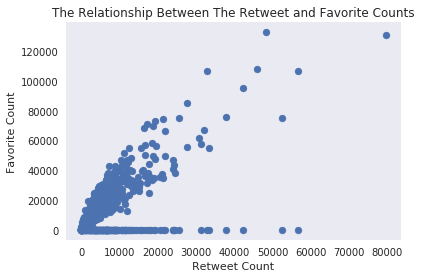

In [50]:
#1. Is there a relationship between the retweet and favourite counts?
#A scatter plot is the right graph for this analysis.

plt.scatter(master.retweet_count, master.favorite_count);
plt.title("The Relationship Between The Retweet and Favorite Counts");
plt.xlabel("Retweet Count");
plt.ylabel("Favorite Count");


The chart shows a strong positive relationships between the count of  retweets and favourites. Although there are outliers,  where the favorite count is zero. Apparently this data extraction error since this is not normal on Twitter, normally the favorite count exceeds the retweet counts such as in our case.

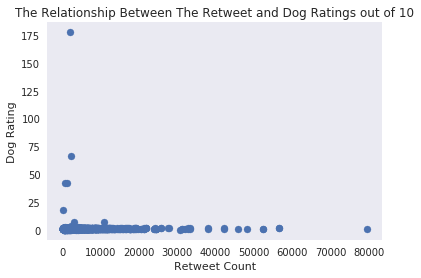

In [51]:
#2. Taking the retweet count as a measure, is there a relationship between the number of retweets and the rating?
#A scatter plot is the right graph for this analysis.

plt.scatter(master.retweet_count, master.score);
plt.title("The Relationship Between The Retweet and Dog Ratings out of 10");
plt.xlabel("Retweet Count");
plt.ylabel("Dog Rating");

The chart is not clear due to few ouliers with rating over 5. Perhaps it's better to exclude them and redo the analysis

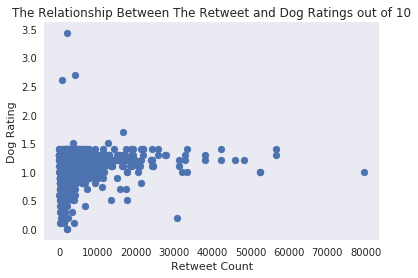

In [52]:
master_2=master.query('score<5')

plt.scatter(master_2.retweet_count, master_2.score);
plt.title("The Relationship Between The Retweet and Dog Ratings out of 10");
plt.xlabel("Retweet Count");
plt.ylabel("Dog Rating");

The graph shows that for ratings up to 1.5, the higher the dog rating the more retweets it gets.

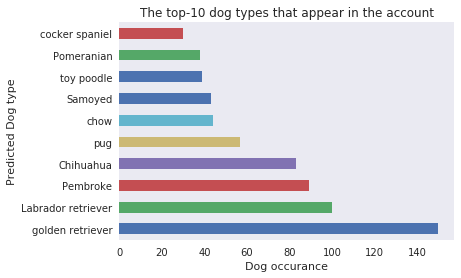

In [53]:
#3. What are the types of dogs that are more frequently featured in the account based on the prediction algorithm (p1)?
#A bar chart is the right graph for this analysis.

master.p1.value_counts().head(10).plot(kind='barh')
plt.title("The top-10 dog types that appear in the account");
plt.ylabel("Predicted Dog type");
plt.xlabel("Dog occurance");

From the graph, it appears that the retriever dogs are the one most ocurring in the account (mid-size dog, could be argued that they are most likly to meet in daily life), followed by small-size dogs (Pembroke, Chihuahua, Pug).

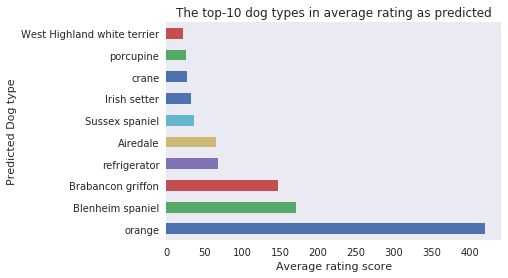

In [54]:
#4. What types of dogs generally have higher rating (p1)??
#A bar chart is the right graph for this analysis.

master.groupby(['p1']).rating_numerator.mean().sort_values(ascending=False).head(10).plot(kind='barh');

plt.title("The top-10 dog types in average rating as predicted");
plt.ylabel("Predicted Dog type");
plt.xlabel("Average rating score");

There are a number of predicted values here that do not appear to be a type of dog (Orange, Refrigerator, Crane). Since there is no simple programatic way of cleaning these, we will leave them as-is.
Other than that the Blenhein Spaniel, Barbancon Griffon, and Airedale dogs are amongsth the highset rated dogs on average (although they are outliers since most ratins do not exceed 25).